In [1]:
!ls ../data/raw

column_names.md   kc_house_data.csv


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/raw/kc_house_data.csv')

In [3]:
from sklearn.model_selection import train_test_split
y = df["price"]
X= df.drop(['price'], axis=1)

# split data into testing set and training set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler

numerical_cols = ['sqft_living',
 'sqft_lot',
 'sqft_above',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']
categorical_cols = ['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_renovated',
 'zipcode']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')), 
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
y_train_hat = my_pipeline.predict(X_train)
y_test_hat = my_pipeline.predict(X_test)

In [40]:
from sklearn.metrics import r2_score
# calcuate r-squared and adjusted r-squared
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)

In [42]:
(train_r_squared, test_r_squared)

(0.845350091433438, 0.8298147871609368)

### Recursive feature elimination with cross-validation
Check to see if we can get same results with less features

In [10]:
%matplotlib inline

/Users/yrgg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Optimal number of features : 208


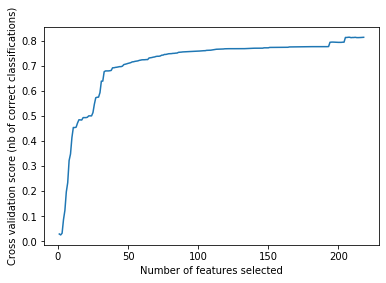

In [11]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=StratifiedKFold(2),
              scoring='r2')

test_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rfecv)])

test_pipeline.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

This graph shows what I already discovered manually, and that is that without the hot encoding categorical features, I can reach a R-squared value of around 70, and after hot encoding, it bumps it up to 83, but adds a large amount of features.